In [445]:
import numpy as np
import pandas as pd

In [395]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [396]:
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors

In [397]:
data = pd.read_csv( 
    "https://raw.githubusercontent.com/lucifertrj/"
    "100DaysOfML/main/Day14%3A%20Logistic_Regression"
    "_Metric_and_practice/heart_disease.csv") 
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [347]:
#s = pd.Series(data['oldpeak'], name="vals")
#s = pd.Series(data['oldpeak'])

In [399]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [400]:
data['thalach_Class']=pd.qcut(data['thalach'], q=4, labels=[0, 1, 2, 3])
#data['thalach_Class']=pd.qcut(data['thalach'], q=5, labels=["0", "1", "2", "3", "4"])

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    int64   
 1   sex            303 non-null    int64   
 2   cp             303 non-null    int64   
 3   trestbps       303 non-null    int64   
 4   chol           303 non-null    int64   
 5   fbs            303 non-null    int64   
 6   restecg        303 non-null    int64   
 7   thalach        303 non-null    int64   
 8   exang          303 non-null    int64   
 9   oldpeak        303 non-null    float64 
 10  slope          303 non-null    int64   
 11  ca             303 non-null    int64   
 12  thal           303 non-null    int64   
 13  target         303 non-null    int64   
 14  thalach_Class  303 non-null    category
dtypes: category(1), float64(1), int64(13)
memory usage: 33.8 KB


In [402]:
data['thalach_Class']

0      1
1      3
2      3
3      3
4      2
      ..
298    0
299    0
300    1
301    0
302    3
Name: thalach_Class, Length: 303, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [403]:
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_Class
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,1


In [404]:
data.thalach_Class = pd.to_numeric(data.thalach_Class)

In [405]:
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_Class
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,1


In [406]:
df_x = data.drop(['thalach_Class'], axis=1)

In [407]:
cibles = data['thalach_Class']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(df_x, cibles, test_size=0.2, random_state=126)

In [409]:
#Proceder à une Standardisation (normalisation standard) des données
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [250]:
##################################  KNN  ##################################

In [314]:
###(a) Sélectionnez les hyperparamètres sur 
###l'échantillon d’apprentissage par validation croisée

In [410]:
score_model = []
for k in range(2, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score_model.append(knn.score(X_test_scaled, y_test))

In [381]:
#Besoin de test
score_model

[0.5245901639344263,
 0.6065573770491803,
 0.6557377049180327,
 0.6065573770491803,
 0.6721311475409836,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771,
 0.5081967213114754,
 0.5245901639344263]

In [411]:
np.max(score_model)

0.6721311475409836

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


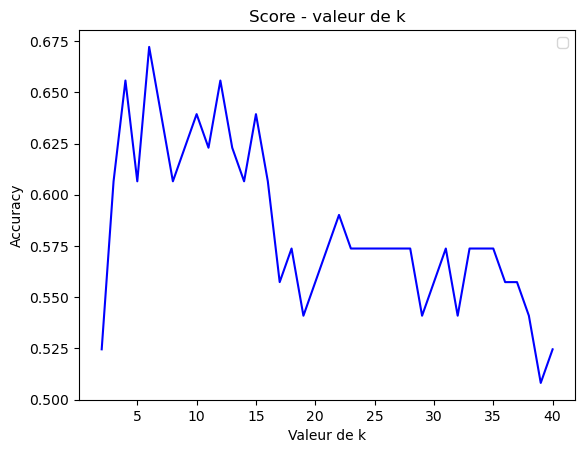

In [412]:
###(b) Affichez les hyperparamètres retenus
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(range(2, 41), score_model, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(2, 41), score_model, color='blue')
plt.title('Score - valeur de k')  
plt.xlabel('Valeur de k')  
plt.ylabel('Accuracy') 
plt.legend();

In [413]:
print("la meilleur valeur de k est 6.")

la meilleur valeur de k est 6.


In [414]:
# Création du classifieur et construction du modèle(avec la meilleure valeur de k)
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=6)
clf_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [415]:
###(c) Appliquez le modèle à l'ensemble de test
y_pred = clf_knn.predict(X_test_scaled) 

In [416]:
###affichez la matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1,2,3
Classe réelle,,,,
0,14,1,1,0
1,2,8,5,1
2,2,1,6,3
3,0,2,2,13


In [417]:
###Et le score du modèle sur ce dernier
score_knn = clf_knn.score(X_test_scaled, y_test) 

In [418]:
score_knn

0.6721311475409836

In [ ]:
################################# SVM ##################################

In [ ]:
###(a) Sélectionnez les hyperparamètres sur 
###l'échantillon d’apprentissage par validation croisée

In [419]:
parameters_svc = {'kernel':['linear', 'sigmoid', 'rbf'], 'C':[0.1, 1, 10, 30]}

In [420]:
svc = svm.SVC()
clf_svc = GridSearchCV(estimator=svc, param_grid=parameters_svc)
clf_svc.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30],
                         'kernel': ['linear', 'sigmoid', 'rbf']})

In [ ]:
###(b) Affichez les hyperparamètres retenus

In [421]:
print(clf_svc.best_estimator_)

SVC(C=10, kernel='linear')


In [ ]:
###(c) Appliquez le modèle à l'ensemble de test,  

In [422]:
y_pred = clf_svc.predict(X_test_scaled)

In [ ]:
###affichez la matrice de confusion

In [423]:
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1,2,3
Classe réelle,,,,
0,16,0,0,0
1,0,13,3,0
2,0,0,10,2
3,0,0,3,14


In [ ]:
###Et le score du modèle sur ce dernier

In [392]:
score_svc = pd.DataFrame.from_dict(clf_svc.cv_results_).loc[:,['params', 'mean_test_score']]
score_svc_sort = score_svc.sort_values('mean_test_score', ascending=False)

In [424]:
score_svc_sort

,params,mean_test_score
6,"{'C': 10, 'kernel': 'linear'}",0.946259
9,"{'C': 30, 'kernel': 'linear'}",0.929762
3,"{'C': 1, 'kernel': 'linear'}",0.917347
7,"{'C': 10, 'kernel': 'sigmoid'}",0.809864
11,"{'C': 30, 'kernel': 'rbf'}",0.801446
0,"{'C': 0.1, 'kernel': 'linear'}",0.793537
8,"{'C': 10, 'kernel': 'rbf'}",0.788946
4,"{'C': 1, 'kernel': 'sigmoid'}",0.776871
10,"{'C': 30, 'kernel': 'sigmoid'}",0.743707
5,"{'C': 1, 'kernel': 'rbf'}",0.669303


In [292]:
#################################### Random Forest ##################################

In [435]:
###(a) Sélectionnez les hyperparamètres sur 
###l'échantillon d’apprentissage par validation croisée

In [436]:
parameters_RanFo = { 
    'max_features': ['sqrt', 'log2', None], 
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
} 

In [437]:
RanFo = RandomForestClassifier()
clf_RanFo = GridSearchCV(estimator=RanFo, param_grid=parameters_RanFo)
clf_RanFo.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28, 30]})

In [ ]:
###(b) Affichez les hyperparamètres retenus

In [440]:
print(clf_RanFo.best_estimator_)

RandomForestClassifier(max_features=None)


In [ ]:
###(c) Appliquez le modèle à l'ensemble de test, 

In [441]:
y_pred = clf_RanFo.predict(X_test_scaled)

In [ ]:
###affichez la matrice de confusion

In [442]:
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1,2,3
Classe réelle,,,,
0,16,0,0,0
1,1,15,0,0
2,0,0,12,0
3,0,0,0,17


In [ ]:
###Et le score du modèle sur ce dernier

In [443]:
score_RanFo = pd.DataFrame.from_dict(clf_RanFo.cv_results_).loc[:,['params', 'mean_test_score']]
score_RanFo_sort = score_db.sort_values('mean_test_score', ascending=False)

In [339]:
score_dbS

,params,mean_test_score
44,"{'max_features': None, 'min_samples_split': 30}",0.995833
30,"{'max_features': None, 'min_samples_split': 2}",0.995833
43,"{'max_features': None, 'min_samples_split': 28}",0.995833
42,"{'max_features': None, 'min_samples_split': 26}",0.995833
41,"{'max_features': None, 'min_samples_split': 24}",0.995833
40,"{'max_features': None, 'min_samples_split': 22}",0.995833
39,"{'max_features': None, 'min_samples_split': 20}",0.995833
38,"{'max_features': None, 'min_samples_split': 18}",0.995833
37,"{'max_features': None, 'min_samples_split': 16}",0.995833
36,"{'max_features': None, 'min_samples_split': 14}",0.995833


In [ ]:
#Conclusion

In [ ]:
#(d) Quel modèle fournit la meilleure précision ?

In [444]:
print("Au vu des 3 matrices de confusion, le model.... fournit les meilleurs prédiction donc la meilleure précision")

Au vu des 3 matrices de confusion, le model.... fournit les meilleurs prédiction donc la meilleure précision
